For a 500×500 matrix with 90% sparsity:
Theoretical optimal stride: 3.16
Practical stride values to consider: [3, 2, 5, 7, 11, 13, 10]

Stride evaluation (higher score is better):
Stride 3: score=1.990, coverage=1.00, efficiency=0.99
Stride 2: score=1.650, coverage=1.00, efficiency=0.85
Stride 5: score=0.600, coverage=0.40, efficiency=0.40
Stride 7: score=0.403, coverage=0.20, efficiency=0.20
Stride 11: score=0.162, coverage=0.08, efficiency=0.08
Stride 13: score=0.116, coverage=0.06, efficiency=0.06
Stride 10: score=0.000, coverage=0.10, efficiency=0.10

Recommended stride: 3

Generating visualization across sparsity levels...


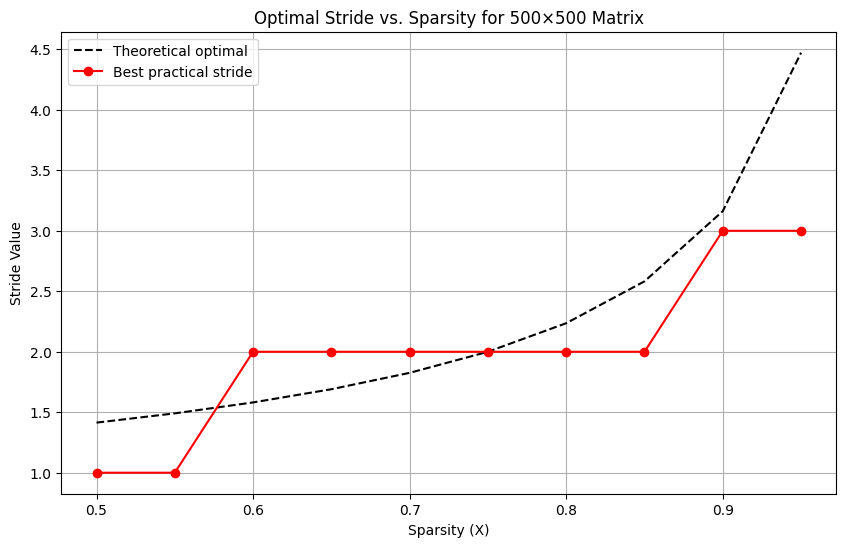

For a 10×10 matrix with 50% sparsity:
Theoretical optimal stride: 1.41
Practical stride values to consider: [1, 2, 3]

Stride evaluation (higher score is better):
Stride 1: score=1.300, coverage=1.00, efficiency=0.50
Stride 2: score=0.800, coverage=0.50, efficiency=0.50
Stride 3: score=0.360, coverage=0.18, efficiency=0.18

Recommended stride: 1

Generating visualization across sparsity levels...


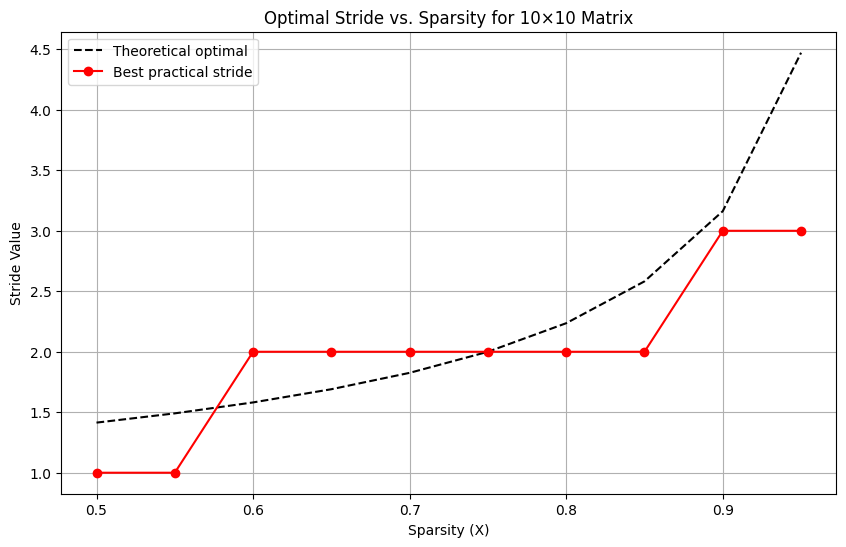

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sp

def calculate_optimal_stride(matrix_size, sparsity):
    """
    Calculate the optimal stride for a sparse matrix.
    
    Parameters:
    -----------
    matrix_size : int
        Size of the matrix (N for an N×N matrix)
    sparsity : float
        Sparsity level (between 0 and 1, e.g., 0.8 for 80% sparsity)
        
    Returns:
    --------
    optimal_stride : float
        Theoretical optimal stride
    practical_strides : list
        List of practical stride values to consider
    """
    # Theoretical optimal stride
    optimal_stride = 1 / np.sqrt(1 - sparsity)
    
    # Generate practical stride values
    # We want to avoid strides that share common factors with matrix_size
    practical_strides = []
    
    # Add the closest integer to optimal_stride
    closest = max(1, int(round(optimal_stride)))
    practical_strides.append(closest)
    
    # Add small prime numbers for more regular distribution
    for stride in [2, 3, 5, 7, 11, 13]:
        if stride != closest and stride < matrix_size // 2:
            practical_strides.append(stride)
    
    # Add a stride based on matrix dimension
    matrix_based = max(1, int(matrix_size / (matrix_size * (1 - sparsity))))
    if matrix_based not in practical_strides:
        practical_strides.append(matrix_based)
    
    return optimal_stride, practical_strides

def evaluate_stride_quality(matrix_size, sparsity, strides):
    """
    Evaluate and score different stride values for a given matrix size and sparsity.
    
    Parameters:
    -----------
    matrix_size : int
        Size of the matrix (N for an N×N matrix)
    sparsity : float
        Sparsity level (between 0 and 1)
    strides : list
        List of stride values to evaluate
        
    Returns:
    --------
    results : list of dict
        Evaluation results for each stride
    best_stride : int
        The recommended stride value
    """
    non_zeros = int(matrix_size * matrix_size * (1 - sparsity))
    results = []
    
    for stride in strides:
        # Calculate how many positions we'd have with this stride
        strided_positions = (matrix_size // stride) ** 2
        
        # Calculate coverage - how well this stride covers the needed non-zeros
        coverage = min(1.0, strided_positions / non_zeros)
        
        # Calculate regularity - how evenly distributed the positions are
        # Smaller values are better if stride divides matrix_size
        regularity_penalty = 0
        if matrix_size % stride == 0:
            regularity_penalty = 0.2
        
        # Calculate efficiency - balance between coverage and not having too many strided positions
        efficiency = coverage - max(0, (strided_positions - non_zeros) / (matrix_size * matrix_size))
        
        # Calculate final score (higher is better)
        score = coverage + efficiency - regularity_penalty
        
        results.append({
            'stride': stride,
            'coverage': coverage,
            'efficiency': efficiency,
            'regularity_penalty': regularity_penalty,
            'score': score
        })
    
    # Sort results by score (descending)
    results.sort(key=lambda x: x['score'], reverse=True)
    best_stride = results[0]['stride']
    
    return results, best_stride

def visualize_stride_evaluation(matrix_size, sparsity_levels=None):
    """
    Visualize how different stride values perform across sparsity levels.
    
    Parameters:
    -----------
    matrix_size : int
        Size of the matrix
    sparsity_levels : list or None
        List of sparsity levels to evaluate, or None for default range
    """
    if sparsity_levels is None:
        sparsity_levels = np.linspace(0.5, 0.95, 10)
    
    results = []
    
    for sparsity in sparsity_levels:
        optimal, practical = calculate_optimal_stride(matrix_size, sparsity)
        eval_results, best = evaluate_stride_quality(matrix_size, sparsity, practical)
        results.append({
            'sparsity': sparsity,
            'optimal_stride': optimal,
            'best_practical': best,
            'evaluated_strides': eval_results
        })
    
    # Plotting
    plt.figure(figsize=(10, 6))
    
    # Plot theoretical optimal stride
    plt.plot(sparsity_levels, [r['optimal_stride'] for r in results], 
             'k--', label='Theoretical optimal')
    
    # Plot best practical stride
    plt.plot(sparsity_levels, [r['best_practical'] for r in results],
             'ro-', label='Best practical stride')
    
    plt.xlabel('Sparsity (X)')
    plt.ylabel('Stride Value')
    plt.title(f'Optimal Stride vs. Sparsity for {matrix_size}×{matrix_size} Matrix')
    plt.grid(True)
    plt.legend()
    
    return results

# Example usage
def demo():
    # Matrix properties
    matrix_size = 500
    sparsity = 0.40
    
    # Calculate optimal stride
    optimal_stride, practical_strides = calculate_optimal_stride(matrix_size, sparsity)
    print(f"For a {matrix_size}×{matrix_size} matrix with {sparsity*100:.0f}% sparsity:")
    print(f"Theoretical optimal stride: {optimal_stride:.2f}")
    print(f"Practical stride values to consider: {practical_strides}")
    
    # Evaluate strides
    results, best_stride = evaluate_stride_quality(matrix_size, sparsity, practical_strides)
    print(f"\nStride evaluation (higher score is better):")
    for r in results:
        print(f"Stride {r['stride']}: score={r['score']:.3f}, coverage={r['coverage']:.2f}, efficiency={r['efficiency']:.2f}")
    print(f"\nRecommended stride: {best_stride}")
    
    # Visualize across sparsity levels
    print("\nGenerating visualization across sparsity levels...")
    visualize_stride_evaluation(matrix_size)
    plt.show()

def demo2():
    # Matrix properties
    matrix_size = 10
    sparsity = 0.50
    
    # Calculate optimal stride
    optimal_stride, practical_strides = calculate_optimal_stride(matrix_size, sparsity)
    print(f"For a {matrix_size}×{matrix_size} matrix with {sparsity*100:.0f}% sparsity:")
    print(f"Theoretical optimal stride: {optimal_stride:.2f}")
    print(f"Practical stride values to consider: {practical_strides}")
    
    # Evaluate strides
    results, best_stride = evaluate_stride_quality(matrix_size, sparsity, practical_strides)
    print(f"\nStride evaluation (higher score is better):")
    for r in results:
        print(f"Stride {r['stride']}: score={r['score']:.3f}, coverage={r['coverage']:.2f}, efficiency={r['efficiency']:.2f}")
    print(f"\nRecommended stride: {best_stride}")
    
    # Visualize across sparsity levels
    print("\nGenerating visualization across sparsity levels...")
    visualize_stride_evaluation(matrix_size)
    plt.show()
if __name__ == "__main__":
    demo()
    demo2()